In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


\begin{equation}
H ( p_{1} , \dots , p_{n} ) = - \sum_{i=1}^{n} p_{i} \log p_{i}
\end{equation}

\begin{equation}
H ( p ) = - p \log p - ( 1 - p ) \log ( 1 - p )
\end{equation}

\begin{equation}
\frac{ d H }{ d p } = 0
\end{equation}

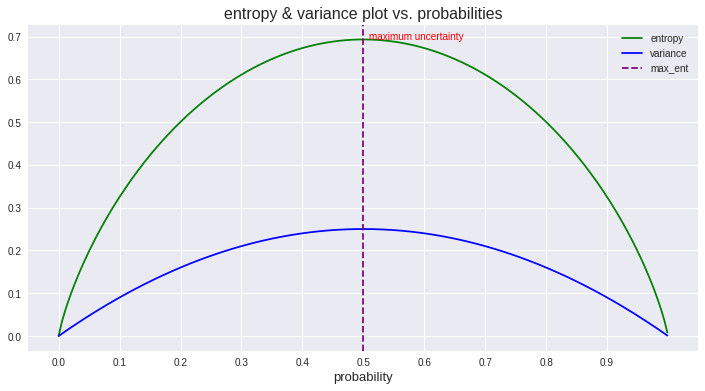

In [64]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(1e-10,0.999,200)
entropy = lambda p : - p * np.log(p) - (1 - p) * np.log(1-p)
var = lambda p : p * ( 1 - p )


with plt.style.context('seaborn'):
    fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (12,6))
    ax.plot(xs , entropy(xs) , color = 'green' , label = 'entropy')
    ax.plot(xs , var(xs) , color = 'blue' , label = 'variance')
    ax.axvline(0.5 , linestyle = '--' , color = 'purple' , label = 'max_ent')
    ax.legend(loc=0)
    ax.annotate(text = 'maximum uncertainty' , xy = (0.51 , entropy(0.5)) , color = 'red')
    ax.set_xticks(np.arange(0,1,0.1))
    ax.set_xlabel("probability" , size = 13)
    ax.set_title("entropy & variance plot vs. probabilities" , size = 16)
    plt.show();

Hence, our problem has the following constraints

\begin{equation}
\begin{split}
& \sum_{i=1}^{n} p_{i} = 1 \\
& \sum_{i=1}^{n} f_{j} ( x_{i} ) p_{i} = m_{j} , \ j = 1 , \dots , m \\
\end{split}
\end{equation}

\begin{equation}
\begin{split}
& 0 = - \nabla H +  ( \lambda_{0} - 1 ) \nabla \left( \sum_{i=1}^{n} p_{i} \right) + \sum_{j=1}^{m} \lambda_{j} \nabla \left( \sum_{i=1}^{n} f_{j} ( x_{i} ) p_{i} \right) \\  
& = \sum_{i=1}^{n} \vec{e_{i}} \left( \lambda_{0} - 1 + \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) + \log p_{i} + 1 \right)  \\
\implies & p_{i} = e^{ - \lambda_{0} - \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) } , \ \forall i = 1 , \dots , n \\
\end{split}
\end{equation}

Since $\sum_{i=1}^{n} p_{i} = 1$ we obtain
\begin{equation}
e^{ \lambda_{0} } = \sum_{i=1}^{n} e^{ - \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) }
\end{equation}

Thus,

\begin{equation}
p_{i} = \frac{ e^{ - \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) } }{ \sum_{i=1}^{n} e^{ - \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) } }
\end{equation}

where
\begin{equation}
\mathcal{Z} ( \lambda_{1} , \dots , \lambda_{n} ) = \sum_{i=1}^{n} e^{ - \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) }
\end{equation}

is the partition function. By adding the initial constraints we obtain the following equations

\begin{equation}
\begin{split}
m_{j} & = \sum_{i=1}^{n} f_{j} ( x_{i} ) p_{i}  \\
      & = \frac{ \sum_{i=1}^{n} f_{j} ( x_{i} ) e^{ - \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) }}{ \sum_{i=1}^{n} e^{ - \sum_{j=1}^{m} \lambda_{j} f_{j} ( x_{i} ) } }.
\end{split}
\end{equation}

In the case of our risky asset problem, we have only one constraint, hence our problem is simplified to solving the following equation:

\begin{equation}
\begin{split}
m & = \sum_{i=1}^{n} f ( x_{i} ) p_{i} \\
  & = \frac{ \sum_{i=1}^{n} f ( x_{i} ) e^{ - \lambda_{1} f ( x_{i} ) }}{ \sum_{i=1}^{n} e^{ - \lambda_{1} f ( x_{i} ) } }
\end{split}
\end{equation}

We can define a new function 
\begin{equation}
\begin{split}
g ( \lambda ) & = m - \frac{ \sum_{i=1}^{n} f ( x_{i} ) e^{ - \lambda f ( x_{i} ) }}{ \sum_{i=1}^{n} e^{ - \lambda f ( x_{i} ) } } \\
              & = m - \mathbb{E} [ f ( X ) ] \\
\end{split}
\end{equation}

and our problem becomes equivalent to solving the $g ( \lambda_{1} ) = 0$.

Note that
\begin{equation}
\begin{split}
x = 1
\end{split}
\end{equation}

Now, we can solve this equation by utilizing the Newton-Raphson recursive algorithm:
    $$\lambda_{n+1} = \lambda_{n} - \frac{ g ( \lambda_{n} ) }{ g ' ( \lambda_{n} ) }.$$

\begin{equation}
\begin{split}
g ' ( \lambda ) & = \frac{ \sum_{i=1}^{n} f^{2} ( x_{i} ) e^{ - \lambda f ( x_{i} ) } \sum_{i=1}^{n} e^{ - \lambda f ( x_{i} ) }  - \left( \sum_{i=1}^{n} f ( x_{i} ) e^{ - \lambda f ( x_{i} ) } \right)^{2} }{ \left( \sum_{i=1}^{n} e^{ - \lambda f ( x_{i} ) } \right)^{2} } \\
      & = \sum_{i=1}^{n} f^{2} ( x_{i} ) \frac{ e^{ - \lambda f ( x_{i} ) } }{ \sum_{i=1}^{n} e^{ - \lambda f ( x_{i} ) } } -  \left( \sum_{i=1}^{n} f ( x_{i} ) \frac{ e^{ - \lambda f ( x_{i} ) } }{ \sum_{i=1}^{n} e^{ - \lambda f ( x_{i} ) } } \right)^{2} \\
      & = \mathbb{Var} [ f ( X ) ] \\
\end{split}
\end{equation}

## Python Implementation

In [73]:
import numpy as np
from dataclasses import dataclass , field
from typing import Callable
from itertools import count
import matplotlib.pyplot as plt

@dataclass
class MaxEnt:
    
    total_events : int
    payoff_map : Callable[[int],float]
    payoffs : np.ndarray = field(init = False)
    multiplier : float = field(init = False , default = None)
    
    def __post_init__(self) -> None:
        self.payoffs = self.payoff_map(np.arange(1,self.total_events+1))
    
    def partition_function(self, mu: float) -> float:
        return (np.e**( - mu * self.payoffs)).sum()
    
    def gibbs_distr(self, mu : float ) -> np.ndarray:
        partition = self.partition_function( mu )
        return np.e**( - mu * self.payoffs)/partition
    
    def _trainer(self , mean : float , mu : float) -> float:
        return mean - np.dot( self.payoffs , self.gibbs_distr(mu) )
    
    def _gradient(self , mu : float ) -> float:
        gibbs = self.gibbs_distr(mu)
        return np.dot( self.payoffs**2 , gibbs ) - np.dot( self.payoffs , gibbs )**2
    
    @property
    def predict_proba(self) -> np.ndarray:
        try:
            return self.gibbs_distr(self.multiplier)
        except Exception:
            raise Exception('Model is not fitted!')
            
    def predict(self) -> int:
        return self.predict_proba.argmax() + 1
    
    
    def fit(self , mean:float , tolerance : float = 1e-10 , max_iter : int = 100 , verbose : bool = False ) -> None:
        mu = 0
        counter = count()
        iterations = next(counter)
        while abs(self._trainer(mean , mu)) > tolerance:
            
            ### Newton-Raphson implementation
            mu = mu - self._trainer(mean , mu)/self._gradient(mu)
            
            iterations = next(counter)
            if verbose:
                print(f'{iterations=}: ({mu:.3f},{self._trainer(mean,mu):.3f})')
            
            if iterations > max_iter:
                print("Maximum iterations limit exceeded.")
                break
        
        ### assigned the trained value to our multiplier attribute
        self.multiplier = mu

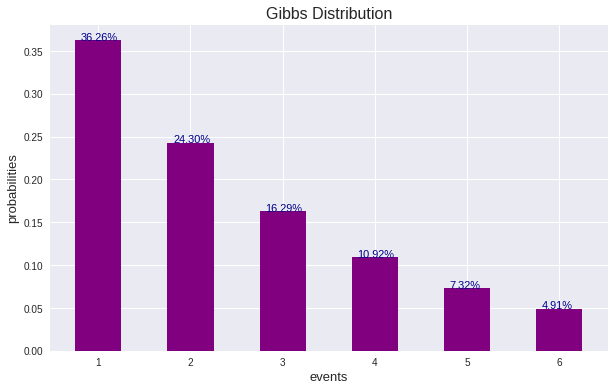

In [74]:
def main():
    total_events = 6
    f = lambda i : i
    model = MaxEnt(total_events , payoff_map = f)
                
    multiplier = 0.4       
    with plt.style.context('seaborn'):
        fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))
        probabilities = model.gibbs_distr(multiplier)
        ax.bar(np.arange(1,total_events+1,1) , probabilities , width = 0.5 , color = 'purple')
        ax.set_title("Gibbs Distribution" , size = 16)
        ax.set_ylabel("probabilities" , size = 13)
        ax.set_xlabel("events" , size = 13)
        for i , patch in enumerate(ax.patches):
            ax.annotate(text = f'{probabilities[i]*100:.2f}%' , 
                        xy = (patch.get_x() + patch.get_width()/8 , probabilities[i]),
                       size = 11,color = 'darkblue')
        plt.show();
        
main()

## Die Toss Problem

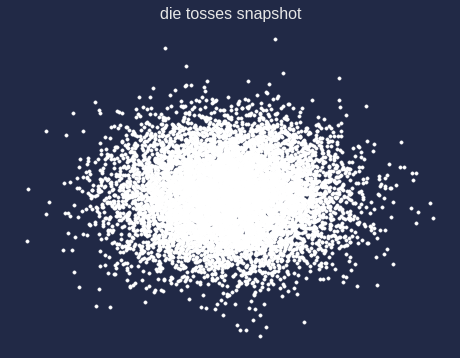

In [68]:
import seaborn as sns
import mplcyberpunk
data = np.random.normal(size = (10000 , 2))
X = data[:,0]
Y = data[:,1]

with plt.style.context('cyberpunk'):
    fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (8,6))
    sns.scatterplot(x = X, y = Y , ax = ax , color = 'white' , s = 12)
    
    # Hide
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("die tosses snapshot" , size = 16)

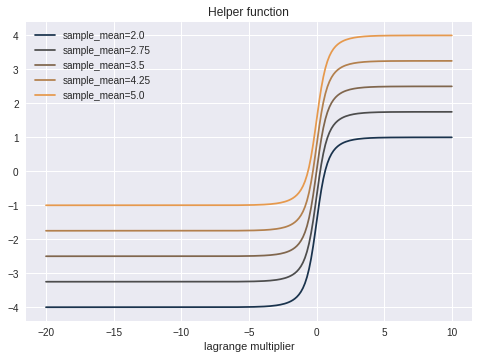

In [76]:
multipliers = np.linspace(-20,10,200)
with plt.style.context('seaborn'):
    for i , sample_mean in enumerate(np.linspace(2,5,5)):
        plt.plot( multipliers , 
                 [model._trainer(sample_mean , mu) for mu in multipliers] , 
                 label = f'{sample_mean=}',
                color = (0.1+ i*0.2,0.2+ i*0.1,0.3))
    plt.legend(loc=0)
    plt.xlabel("lagrange multiplier")
    plt.title("Helper function")

In [69]:
mean = 4.7
payoffs = np.arange(1,7,1)
model = MaxEnt(np.arange(1,7,1))
model.fit(mean , verbose = True , tolerance = 1e-19 , max_iter = 100)

iteration 0:	-0.4114285714285716	0.10947573430377933
iteration 1:	-0.4615312284580596	0.00357165914125801
iteration 2:	-0.46328011392762125	4.369179691821046e-06
iteration 3:	-0.4632822585710512	6.569855770521826e-12
iteration 4:	-0.4632822585742761	0.0


In [70]:
model.multiplier_

-0.4632822585742761

Text(0.5, 0, 'probabilities')

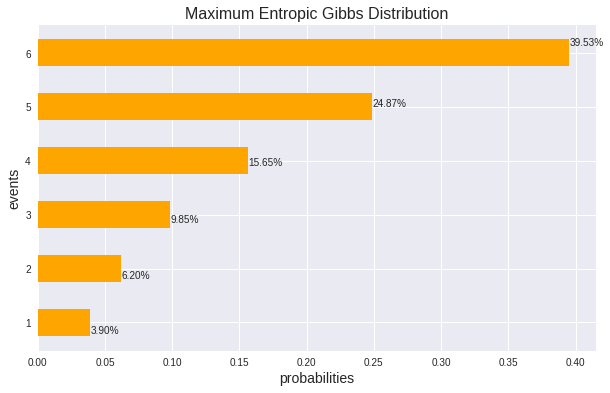

In [71]:
fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))
events = 6
ax.barh(range(1,events+1),
         model.predict_proba(),
         color = 'orange',
         height = 0.5)

for i , patch in enumerate(ax.patches):
    ax.annotate( text = f"{model.predict_proba()[i]*100:.2f}%" , 
                 xy = (patch.get_x() + model.predict_proba()[i] , 
                       patch.get_y() + patch.get_width())
               )
ax.set_title("Maximum Entropic Gibbs Distribution" , size = 16)
ax.set_ylabel("events" , size = 14)
ax.set_xlabel("probabilities" , size = 14)

## And Beyond ...

In [72]:
means = np.linspace(1,6,100)
probabilities = None
model = MaxEnt(np.arange(1,7,1))

for sample_mean in means:
    model.fit(sample_mean)
    if probabilities is not None:
        probabilities = np.vstack([probabilities , model.predict_proba()])
    else:
        probabilities = model.predict_proba()
probabilities

array([[1.00000000e+00, 4.45909713e-12, 1.98835472e-23, 8.86626682e-35,
        3.95355449e-46, 1.76292835e-57],
       [9.51923022e-01, 4.57655938e-02, 2.20027201e-03, 1.05782456e-04,
        5.08570209e-06, 2.44505249e-07],
       [9.08254471e-01, 8.33287792e-02, 7.64508810e-03, 7.01406797e-04,
        6.43513179e-05, 5.90398058e-06],
       [8.68402058e-01, 1.14283842e-01, 1.50400340e-02, 1.97930538e-03,
        2.60481444e-04, 3.42799973e-05],
       [8.31857689e-01, 1.39886122e-01, 2.35234072e-02, 3.95572255e-03,
        6.65198741e-04, 1.11860567e-04],
       [7.98182344e-01, 1.61130408e-01, 3.25276655e-02, 6.56641437e-03,
        1.32557308e-03, 2.67595659e-04],
       [7.66998056e-01, 1.78806471e-01, 4.16842698e-02, 9.71764804e-03,
        2.26542732e-03, 5.28127887e-04],
       [7.37981689e-01, 1.93541917e-01, 5.07579989e-02, 1.33117130e-02,
        3.49110892e-03, 9.15572735e-04],
       [7.10858657e-01, 2.05836479e-01, 5.96020822e-02, 1.72583996e-02,
        4.99734816e-03, 

In [252]:
def sample(gibbs):
    roll = rand()
    for i , p in enumerate(gibbs):
        if roll <= sum(gibbs[:i+1]):
            return i + 1

samples = [sample(gibbs) for _ in range(20)]
samples

[4, 3, 5, 1, 6, 4, 6, 5, 5, 6, 4, 6, 5, 6, 1, 6, 4, 6, 5, 6]

In [ ]:
p > 30?

In [255]:
def run_experiment(periods : int , ceiling : int , iterations : int = 10000):
    total_counts = 0
    for _ in range(iterations):
        if sum([sample(gibbs) for _ in range(periods)]) > ceiling:
            total_counts += 1
    return total_counts/iterations

periods = 10
n = np.linspace(periods + 1 , periods*6 - 1 , 10)
probabilities = [run_experiment(periods , c) for c in n]
probabilities

[1.0, 1.0, 1.0, 0.9999, 0.9983, 0.9756, 0.7866, 0.4026, 0.0681, 0.0002]

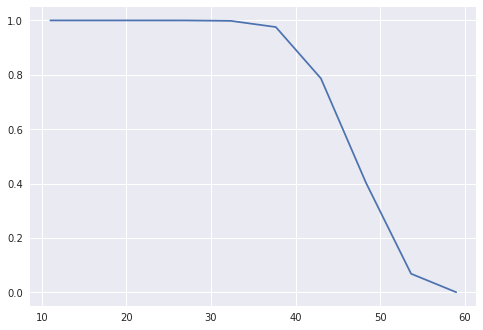

In [257]:
with plt.style.context('seaborn'):
    plt.plot(n , probabilities)

In [77]:
from scipy.stats import norm

In [1]:
epochs = 30 
mean = expected_val*epochs
std = var()**0.5*epochs
deviations = 4
xs = np.linspace(mean - 4*std , mean + 4*std)
fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))
ax.plot( xs , norm.pdf(xs , mean , std));

NameError: name 'expected_val' is not defined

In [212]:
f = lambda i : i
model = MaxEnt(total_events = 6 , payoff_map = f)
sample_mean = 2.8

model.fit(sample_mean , verbose = True)

iterations=1: (0.240,-0.024)
iterations=2: (0.249,-0.000)
iterations=3: (0.249,-0.000)
iterations=4: (0.249,0.000)


In [213]:
model.predict_proba

array([0.28424292, 0.22158001, 0.17273149, 0.13465188, 0.10496714,
       0.08182656])

In [214]:
model.multiplier

0.2490454657202743

In [205]:
model.predict()

6